# Importing Libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
df = pd.read_csv("/content/drive/MyDrive/ML_Projects/Supply_Chain/dataset/supply_chain_data.csv")

# Exploratory Data Analysis

In [19]:
print(df.head(5))

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [20]:
print(df.isnull().sum())

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64


In [21]:
print(df.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

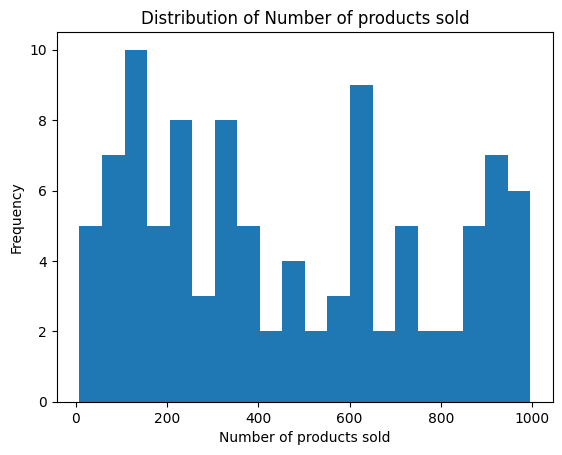

In [22]:
plt.hist(df["Number of products sold"], bins=20)
plt.title('Distribution of Number of products sold')
plt.xlabel('Number of products sold')
plt.ylabel('Frequency')
plt.show()

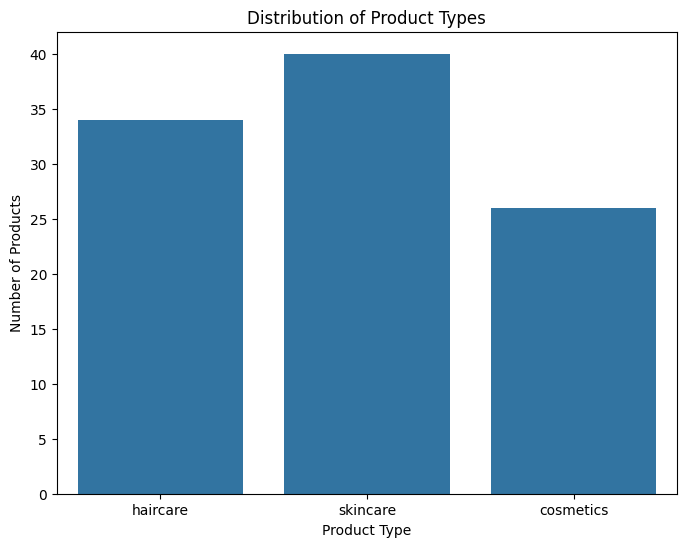

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Product type')
plt.title('Distribution of Product Types')
plt.xlabel('Product Type')
plt.ylabel('Number of Products')
plt.show()

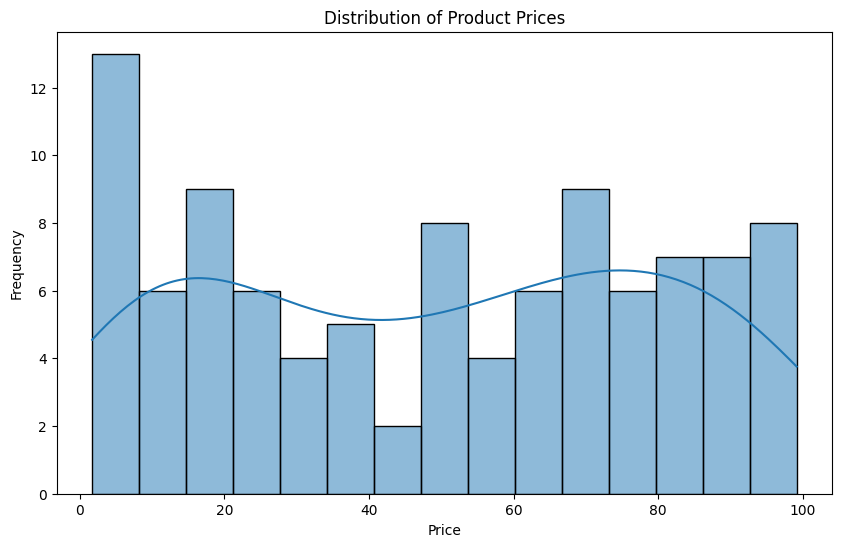

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=15, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

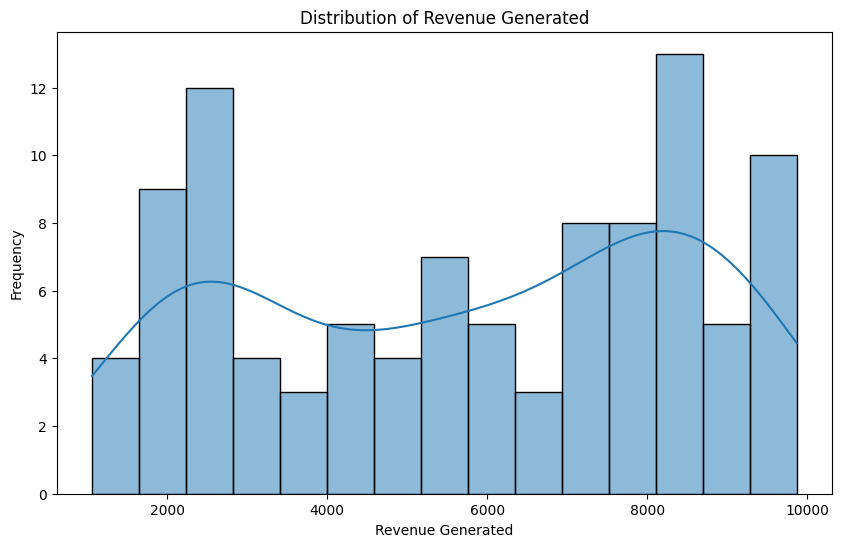

In [34]:
# Histogram for Revenue generated
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue generated'], bins=15, kde=True)
plt.title('Distribution of Revenue Generated')
plt.xlabel('Revenue Generated')
plt.ylabel('Frequency')
plt.show()

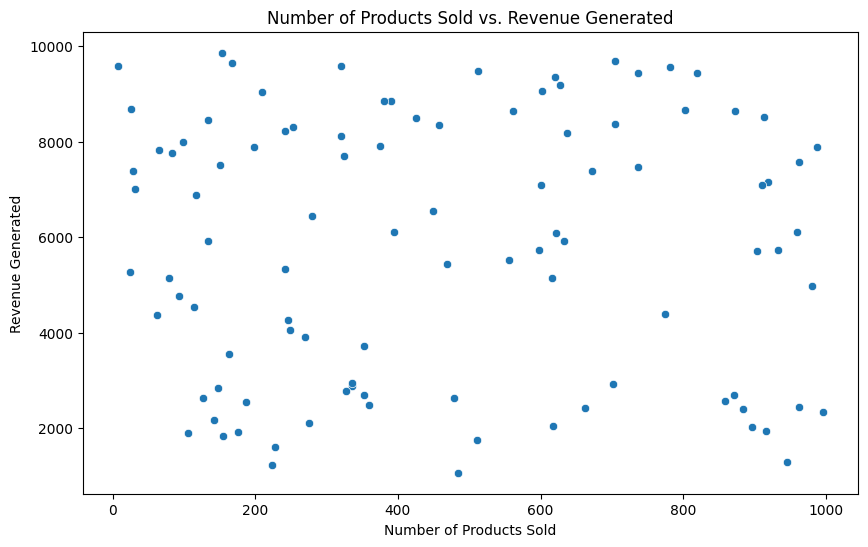

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Number of products sold', y='Revenue generated')
plt.title('Number of Products Sold vs. Revenue Generated')
plt.xlabel('Number of Products Sold')
plt.ylabel('Revenue Generated')
plt.show()

--- Analyzing Customer Demographics ---


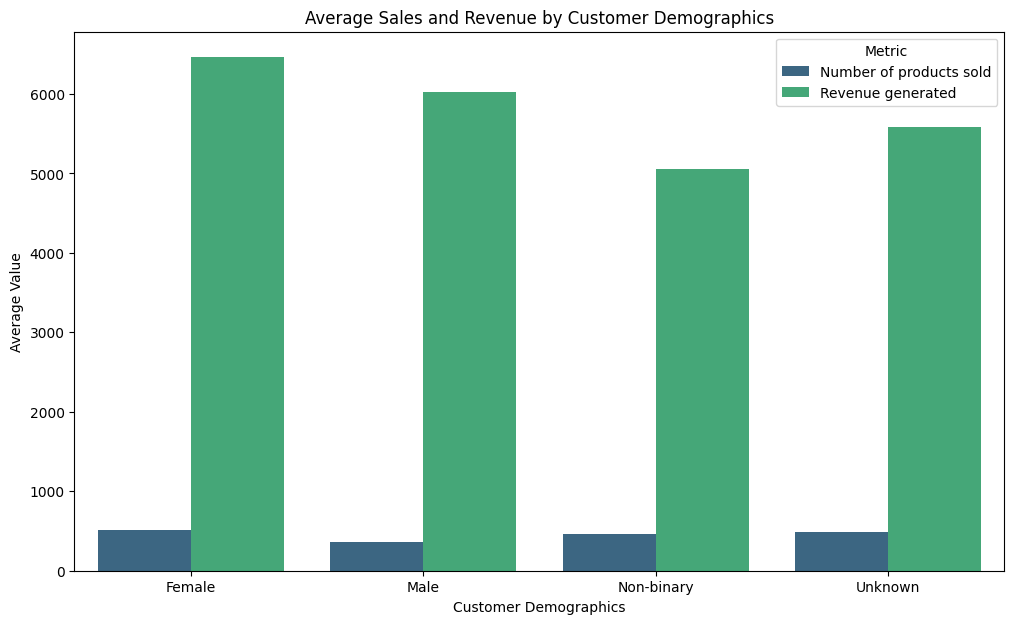

In [36]:
# --- 3a. Customer Demographics Analysis ---
print("--- Analyzing Customer Demographics ---")
# Calculate the mean of 'Number of products sold' and 'Revenue generated' for each demographic group.
customer_sales_revenue = df.groupby('Customer demographics')[['Number of products sold', 'Revenue generated']].mean().reset_index()

# Melt the DataFrame to create a long-form structure suitable for a grouped bar chart.
customer_sales_revenue_melted = customer_sales_revenue.melt(
    id_vars='Customer demographics',
    var_name='Metric',
    value_name='Average Value'
)

plt.figure(figsize=(12, 7))
sns.barplot(
    data=customer_sales_revenue_melted,
    x='Customer demographics',
    y='Average Value',
    hue='Metric',
    palette='viridis'
)
plt.title('Average Sales and Revenue by Customer Demographics')
plt.xlabel('Customer Demographics')
plt.ylabel('Average Value')
plt.show()


--- Analyzing Supply Chain and Logistics ---


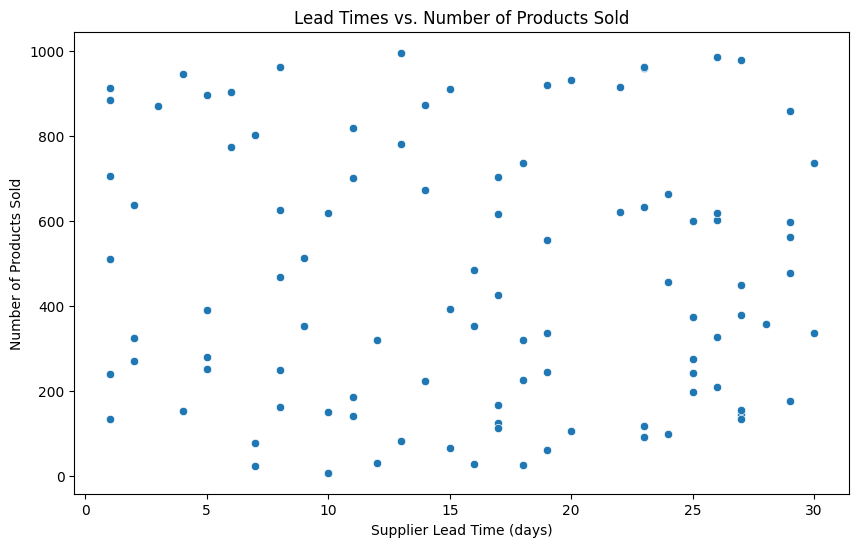

In [37]:
# --- 3b. Supply Chain and Logistics Analysis ---

# Scatter plot for Lead times vs. Number of products sold
print("\n--- Analyzing Supply Chain and Logistics ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Lead times', y='Number of products sold')
plt.title('Lead Times vs. Number of Products Sold')
plt.xlabel('Supplier Lead Time (days)')
plt.ylabel('Number of Products Sold')
plt.show()

/tmp/ipython-input-3647849735.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Shipping carriers', y='Shipping costs', palette='pastel')


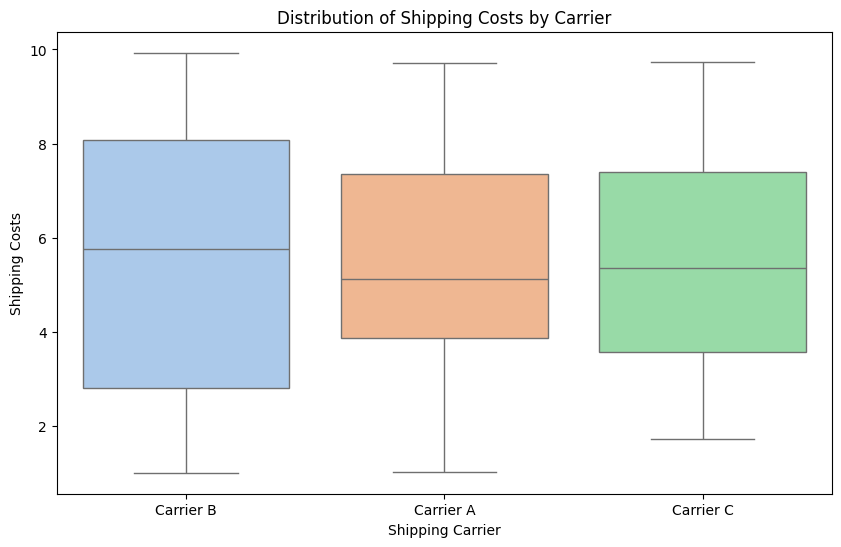

In [38]:
# Box plot for Shipping costs by Shipping carriers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Shipping carriers', y='Shipping costs', palette='pastel')
plt.title('Distribution of Shipping Costs by Carrier')
plt.xlabel('Shipping Carrier')
plt.ylabel('Shipping Costs')
plt.show()

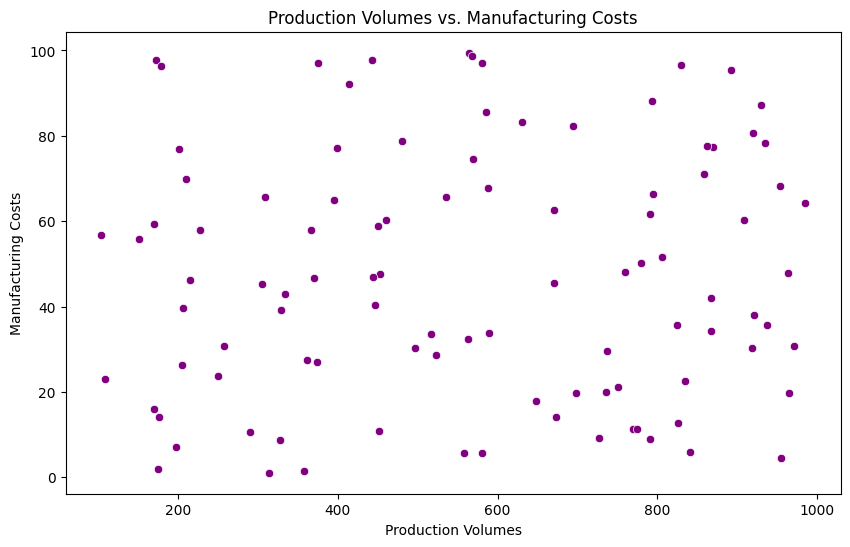

In [39]:
# Scatter plot for Production volumes vs. Manufacturing costs
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Production volumes', y='Manufacturing costs', color='purple')
plt.title('Production Volumes vs. Manufacturing Costs')
plt.xlabel('Production Volumes')
plt.ylabel('Manufacturing Costs')
plt.show()

# Handling Categorical Features

In [40]:
from sklearn.model_selection import train_test_split

In [57]:
categorical_cols = []

for col in df.columns:
  if df[col].dtype == "object":
    categorical_cols.append(col)

if "SKU" in categorical_cols:
  categorical_cols.remove("SKU")

df_categorical = df[categorical_cols]

print(df_categorical.head())

  Product type Customer demographics Shipping carriers Supplier name Location  \
0     haircare            Non-binary         Carrier B    Supplier 3   Mumbai   
1     skincare                Female         Carrier A    Supplier 3   Mumbai   
2     haircare               Unknown         Carrier B    Supplier 1   Mumbai   
3     skincare            Non-binary         Carrier C    Supplier 5  Kolkata   
4     skincare            Non-binary         Carrier A    Supplier 1    Delhi   

  Inspection results Transportation modes   Routes  
0            Pending                 Road  Route B  
1            Pending                 Road  Route B  
2            Pending                  Air  Route C  
3               Fail                 Rail  Route A  
4               Fail                  Air  Route A  


In [58]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [59]:
print(df_encoded.head(5))

    SKU      Price  Availability  Number of products sold  Revenue generated  \
0  SKU0  69.808006            55                      802        8661.996792   
1  SKU1  14.843523            95                      736        7460.900065   
2  SKU2  11.319683            34                        8        9577.749626   
3  SKU3  61.163343            68                       83        7766.836426   
4  SKU4   4.805496            26                      871        2686.505152   

   Stock levels  Lead times  Order quantities  Shipping times  Shipping costs  \
0            58           7                96               4        2.956572   
1            53          30                37               2        9.716575   
2             1          10                88               2        8.054479   
3            23          13                59               6        1.729569   
4             5           3                56               8        3.890548   

   ...  Location_Delhi  Location

# Feature Engineering

In [60]:
df_encoded['Profit'] = df_encoded['Revenue generated'] - df_encoded['Manufacturing costs'] - df_encoded['Shipping costs']

df_encoded['Avg_Price_per_Unit'] = df_encoded['Revenue generated'] / df_encoded['Number of products sold']

print("\n'Profit' and 'Avg_Price_per_Unit' features added.")
print(df_encoded[['Profit', 'Avg_Price_per_Unit']].head())


'Profit' and 'Avg_Price_per_Unit' features added.
        Profit  Avg_Price_per_Unit
0  8612.760341           10.800495
1  7417.566722           10.137092
2  9539.007127         1197.218703
3  7729.482116           93.576342
4  2590.549443            3.084392


# Splitting Data

In [61]:
y = df_encoded['Number of products sold']

# The features (X) are all other columns except the target.
X = df_encoded.drop(columns=['Number of products sold', 'SKU']) # SKU is an identifier, not a feature.

# Split the data. Using a random_state ensures reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (80, 38)
Shape of X_test: (20, 38)
Shape of y_train: (80,)
Shape of y_test: (20,)


In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [63]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [64]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [65]:
y_pred = model.predict(X_test)

In [66]:
# Evaluate the model using common regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # RMSE is the square root of MSE, making it more interpretable
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 132.11
Mean Squared Error (MSE): 29064.77
Root Mean Squared Error (RMSE): 170.48
R-squared (R2) Score: 0.70


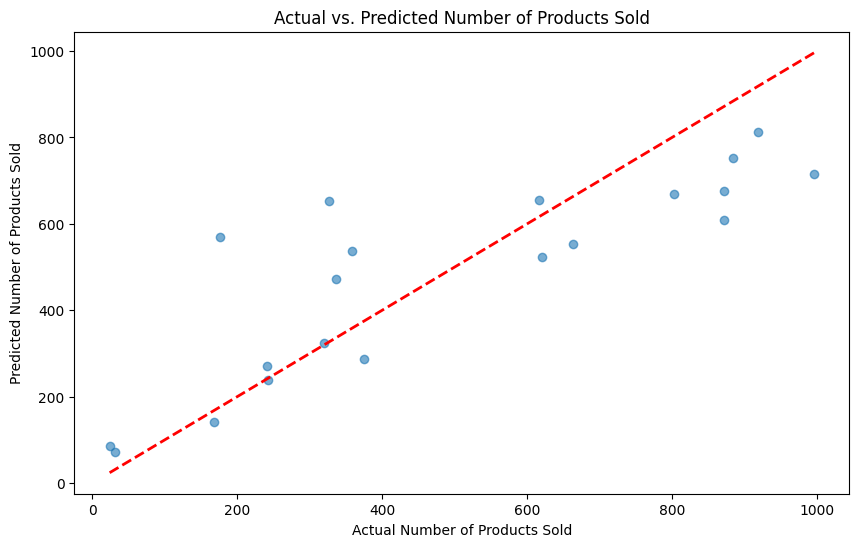

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Number of Products Sold')
plt.xlabel('Actual Number of Products Sold')
plt.ylabel('Predicted Number of Products Sold')
plt.show()

# Feature Importance Analysis

In [68]:
# Get feature importances from the trained model
importances = model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Print the top 15 most important features
print("Top 15 most important features:")
print(feature_importance_df.head(15))

Top 15 most important features:
                       feature  importance
37          Avg_Price_per_Unit    0.670881
2            Revenue generated    0.055165
36                      Profit    0.046917
9           Production volumes    0.042274
11         Manufacturing costs    0.027851
12                Defect rates    0.017974
0                        Price    0.016878
8                    Lead time    0.014554
13                       Costs    0.011916
10     Manufacturing lead time    0.010164
30  Inspection results_Pending    0.010049
7               Shipping costs    0.007183
4                   Lead times    0.006480
3                 Stock levels    0.006370
5             Order quantities    0.005952


/tmp/ipython-input-2502117158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


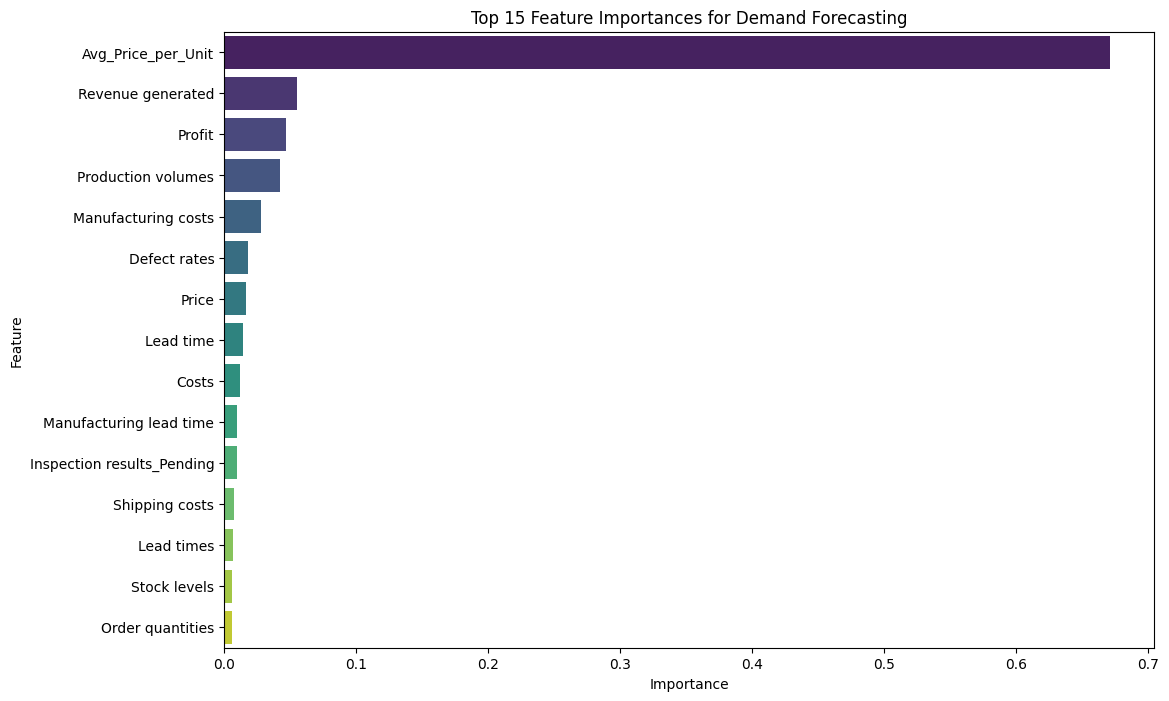

In [69]:
# Visualize the top 15 most important features
plt.figure(figsize=(12, 8))
sns.barplot(
    x='importance',
    y='feature',
    data=feature_importance_df.head(15),
    palette='viridis'
)
plt.title('Top 15 Feature Importances for Demand Forecasting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Feature Selection and Retraining the Model

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
top_features = [
    'Avg_Price_per_Unit',
    'Revenue generated',
    'Profit',
    'Production volumes',
    'Manufacturing costs',
    'Defect rates',
    'Price',
    'Lead time',
    'Costs',
    'Manufacturing lead time',
    'Inspection results_Pending' # This feature had a score just above 0.01
]

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

print(f"Original number of features: {X_train.shape[1]}")
print(f"Number of selected features: {X_train_selected.shape[1]}")
print(f"Selected features: {top_features}")

Original number of features: 38
Number of selected features: 11
Selected features: ['Avg_Price_per_Unit', 'Revenue generated', 'Profit', 'Production volumes', 'Manufacturing costs', 'Defect rates', 'Price', 'Lead time', 'Costs', 'Manufacturing lead time', 'Inspection results_Pending']


In [72]:
final_model = RandomForestRegressor(n_estimators=100, random_state=42) # Re-using same params for comparison

final_model.fit(X_train_selected, y_train)

RandomForestRegressor(random_state=42)

In [73]:
y_pred_final = final_model.predict(X_test_selected)

# Evaluate the model
mae_final = mean_absolute_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print(f"Final Model R-squared (R2) Score: {r2_final:.2f}")
print(f"Final Model Mean Absolute Error (MAE): {mae_final:.2f}")

Final Model R-squared (R2) Score: 0.75
Final Model Mean Absolute Error (MAE): 116.36


# Final Hyperparameter Tuning and Model Evaluation

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object for the final model
grid_search_final = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_final.fit(X_train_selected, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=1)

In [76]:
print("\nBest parameters for the final model:", grid_search_final.best_params_)
print("Best cross-validation R-squared score:", grid_search_final.best_score_)


Best parameters for the final model: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation R-squared score: 0.6733503662931943


In [77]:
# Get the best model from the grid search
final_best_model = grid_search_final.best_estimator_

# Make predictions with the final best model on the feature-selected test data
y_pred_final_tuned = final_best_model.predict(X_test_selected)

# Evaluate the final tuned model
mae_final_tuned = mean_absolute_error(y_test, y_pred_final_tuned)
mse_final_tuned = mean_squared_error(y_test, y_pred_final_tuned)
rmse_final_tuned = np.sqrt(mse_final_tuned)
r2_final_tuned = r2_score(y_test, y_pred_final_tuned)

In [78]:
print("\n--- Final Tuned Model Evaluation on Test Data ---")
print(f"R-squared (R2) Score: {r2_final_tuned:.2f}")
print(f"Mean Absolute Error (MAE): {mae_final_tuned:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_final_tuned:.2f}")


--- Final Tuned Model Evaluation on Test Data ---
R-squared (R2) Score: 0.76
Mean Absolute Error (MAE): 114.75
Root Mean Squared Error (RMSE): 151.49


# Saving the Final Model

In [79]:
import pickle
import os

model_filename = 'demand_forecasting_random_forest_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(final_best_model, file)

print(f"Model successfully saved to {os.path.abspath(model_filename)} using pickle.")

Model successfully saved to /content/demand_forecasting_random_forest_model.pkl using pickle.
